`cd` into `~/Documents/Presentations/`, then use this command:

`jupyter nbconvert Overview-of-ML.ipynb --to slides --post serve --SlidesExporter.reveal_theme=simple --SlidesExporter.reveal_scroll=True --SlidesExporter.reveal_transition=none`

to host slides.

use this to export to index.slides.html:

`jupyter nbconvert --to slides Overview-of-ML.ipynb --reveal-prefix=reveal.js --SlidesExporter.reveal_theme=simple 
--SlidesExporter.reveal_scroll=True 
--SlidesExporter.reveal_transition=none`

* for [choosing color palette](http://seaborn.pydata.org/tutorial/color_palettes.html)

* Use [this](https://medium.com/learning-machine-learning/present-your-data-science-projects-with-jupyter-slides-75f20735eb0f) and [that](https://blog.kdheepak.com/jupyter-notebook-reveal-js-and-github-pages.html) for jupyter slide helps and hosting on github pages.

![coursera](Figures/mlcoursera1.png)

>  Machine learning is the "field of study that gives computers the ability to learn without being explicitly programmed".
    - Arthur Samuel, 1959

I'm excited to be talking with you today about the topic of machine learning. We're going to take a pretty high-level look at the field as a whole. My intent really is that by the end of our time, you'll be fluent enough in machine learning concepts and lingo to develop some intuition into what problems could be solved using machine learning, where it could be integrated into our current projects, and give you some direction if you decide that you'd like to learn more.

I'm going to by giving a brief overview of the field of machine learning, then we are going to cover some core components, and then we'll move quickly through a lot of the common models and typical use cases. We'll end by looking at some recent projects that have had the ML community buzzing, which give us a peak at what's possible with ML.

Now, to start, I thought that it may be appropriate to define exactly why I mean when I say "Machine Learning". Turns out, this is not a trivial thing to define, but as early as 1959, Arthur Samuel famously defined machine learning as "field of study that gives computers the ability to learn without being explicitly programmed". If I were to define it, I might be a little more specific and say that Machine learning algorithms are used to learn from historical data in order to make predictions about novel data.

## Why ML Now?

* Data availability has spiked

* Development of cutting-edge open-source tools and platforms

![eco](Figures/ecosystem.png)

To give you some background about myself, I am a math major at Cornerstone University. I so enjoy studying ML because it takes constructs from statistics, and linear algebra, and calculus, and applies them to data to solve real-world problems. It's fascinating to me! However, due to the rigor of a lot of the math involved, for many years, machine learning was a field reserved for experts. On top of that, until recent years the quantity of data needed was non-existent, so even the experts didn't have much real-world success.
Two things have happened that have really shifted the scales in ML's favor, and made it what it is today.
1. Data availability has spiked
    - With the onset of the digital revolution and the explosion of the internet, collecting data has become cheap and ubiquitous.
2. Development of cutting edge open-source tools and platforms have vastly lowered the barriers to entry into the field
    - Those who want to build ML solutions no longer have to debug incompatible matrix dimensions in C or Fortran. Much of that is abstracted away in modern ML libraries that make it possible to build incredibly complex (and stable) predictive models in just a few lines of code. (We'll see some examples of this later)
    - In this same vein, I read an [article](https://www.kdnuggets.com/2019/01/your-ai-skills-worth-less-than-you-think.html) recently by an ex-google employee who stated that the problems that google's best engineers were working on in 2015 are now being solved by interns in just a few lines of code. This is how quickly the landscape is changing!

All this to say... ML is as accessible as ever. With a high-level understanding of ML, you can very succesfully apply it in practice.

# Major Concepts in Machine Learning

In [169]:
# Here, we import and configure all the libraries we'll need for the entire presentation

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import seaborn as sns

# Setting matplotlib style
plt.style.use(['seaborn-darkgrid', 'bmh'])
# construct cmap
my_cmap = ListedColormap(sns.color_palette("coolwarm").as_hex())

## Supervised Learning

In [170]:
from sklearn.datasets import load_boston

boston = load_boston()

pd.concat([pd.DataFrame(boston.data, columns = boston.feature_names),
           pd.Series(boston.target * 10000, name = "TARGET (house price)")], axis=1).head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET (house price)
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,240000.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,216000.0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,347000.0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,334000.0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,362000.0


So, let's talk through some of the major concepts in ML. We're first going to talk through some terms to give us a baseline to be able to talk about and differentiate between different ml problems. The first thing that you should know is that there are typically two types of machine learning problems - supervised and unsupervised. 


We call a task 'supervised', if our training data is labeled. 
 ---- add explanation of data --- 
 This is the most "solved" of all domains - meaning that given enough data, and a decent algorithm, if there is a signal in the noise, the model will likely find it.

## Unsupervised Learning

In [171]:
from sklearn.datasets import load_iris

customer_data = load_iris()

pd.DataFrame(customer_data.data, columns = ["Customer_Feature_1", 
                                            "Customer_Feature_2", 
                                            "Customer_Feature_3", 
                                            "Customer_Feature_4"]).head()

,Customer_Feature_1,Customer_Feature_2,Customer_Feature_3,Customer_Feature_4
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [172]:
def plot_unsupervised_learning_data():
    # initializing data
    X = np.concatenate((customer_data.data[:,0].reshape(150,1), 
                    customer_data.data[:, 1].reshape(150,1)), axis=1)
    y = (customer_data.target != 0) * 1


    # plotting
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16,6))

    ax1.scatter(customer_data.data[:,0], customer_data.data[:, 1], 
            c=y, cmap = my_cmap)
    ax1.set_xlabel("Customer_Feature_1")
    ax1.set_ylabel("Customer_Feature_2")

    ax2.scatter(customer_data.data[:,2], customer_data.data[:, 3],
           c=y, cmap = my_cmap)
    ax2.set_xlabel("Customer_Feature_3")
    ax2.set_ylabel("Customer_Feature_4")

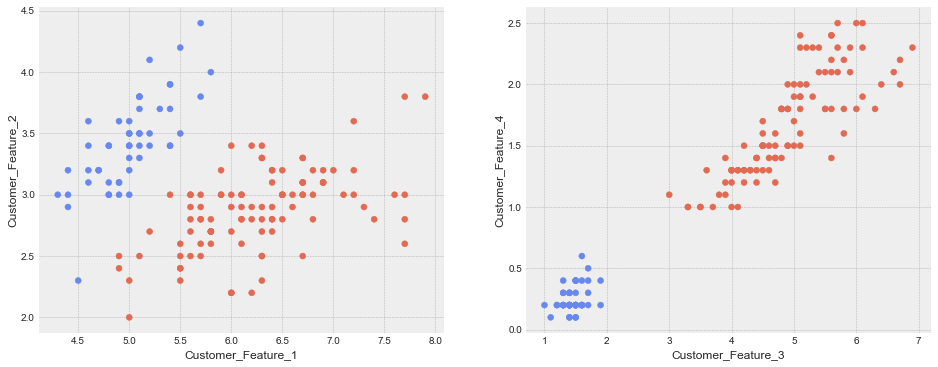

In [173]:
plot_unsupervised_learning_data()

We call a task 'unsupervised' if our training data in not labeled. In this situation we are not concerned with predicting a label for each new data point, but most often trying to cluster similar datapoints together, or identify anomalies. With this customer data, you may try to cluster you customer into subsets or segment your customers into different groups.

It certainly looks like the data can be clustered into different groups! Plotting the data like this can give us some intuition for the heart of unsupervised learning - to infer which cluster a new datapoint should be associated with.

Anomaly detection also falls under this umbrella!

## Classification

![cats-dogs](Figures/cats-dogs.jpeg)

Now, the whole supervised v. unsupervised is a very high-level way to categorize ml aglorithms. Within those supervised and unsupervised buckets, there is another dichotomy we use to make further distinctions between algorithms, that is the type of problem that a given algorithm solves, either classification, or regression.

*Classification* problems are concerned with predicting which class each given data point comes from.
One example of a classification problem is training an algorithm to predict if an image contains a cat or a dog. Your training data for this type of task may look something like this. Other examples could be predicting whether or not a customer will default on their loan, or predicting whether someone is kicking, given the radar data that a sensor is collecting.

## Regression

![lin-reg](Figures/lin_reg.png)

Regression problems, on the other hand are concerned with predicting a real number, a floating point value associated with each data point.
Some examples of regression problems could be: predicting housing prices, predicting how many widgets you'll need in inventory, or predicting how much energy your industrial machinery will consume in a given day.

Classification and Regression algorithms generally work the same way, except for some subtle differences on how the model's output is calculated. In fact, some models can even be adjusted to work in both classification and regression contexts. 

## Taxonomy of ML Aglorithms

![ml-algos-table](Figures/ML_algos_table.png)

With these 4 categories, we have a baseline taxonomy to group together ML tasks and associated algorithms. Here are some examples of algorithms that fall into each of there respective categories. We'll look at a few of these deep in depth later.

## Deep Learning

![nn](Figures/nn.png)

There are actually two other types of machine learning that don't fit into the traditional channels that we throw algorithms into, but I think are worth mentioning. In fact, academia has turned their attention towards trying to make these two types of ml as easy as supervised learning.

The first is `Deep Learning`. You can kind of think of deep learning as machine learning on steroids. If you search for terms like "Deep Learning" you'll either find these weird images of like human-looking robots, or you'll find graphical representations of neural networks, like you see here. The output of neural networks are predictions, just like that of basic machine learning models. This graph is just a fancy way to represent all of the computations that take place to make those predictions. 

Data is the oil that fuels deep learning. To train a deep learning model successfully, you need a lot of data. This can become troublesome in the supervised-learning space, because it is often tough to find hundreds-of-thousands of labeled data points. 

To give you some context for the orders of magnitude that often separate traditional ML models from DL models, you should know that:

* A linear regression model may have 5-10 parameters, while a deep computer vision model may have 500,000 parameters
* A ml model may take 10 seconds to train, while a dl model may take 10 hours to train

## Reinforcement Learning

![rl](Figures/rl.png)

## Reinforcement Learning... gone wrong

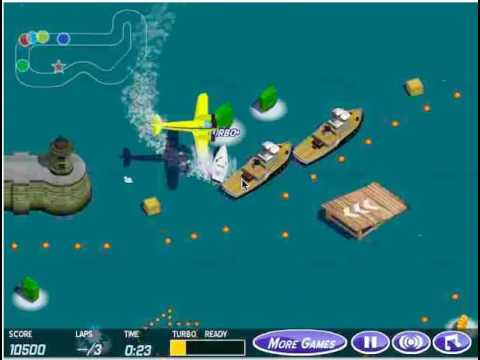

In [5]:
from IPython.display import YouTubeVideo
vid = 'tlOIHko8ySg'
YouTubeVideo(id = vid, width = 850, height = 400)

Another newer type of machine learning is called reinforcement learning. Unlike other types of ml, your model is only given an objective, and then it is up to the model to learn what type of behavior satisfies this objective, typically through tons of simulations.

Has anyone seen the [AlphaGo](https://deepmind.com/research/alphago/) documentary that was recently on Netflix? Is anyone familiar with the board game, Go? I wasn't either. Apparently its this board games that's massively popular across the world (similar to chess.. kinda). Any ways, A few years ago, Google's Deep Mind Team train a reinforcement learning model to play the game Go, and hosted an ultimate showdown where their machine faced off against the international Go champion. Man vs. Machine. Their model won very convincingly, and since then, many have been tinkering with reinforcement learning methods.

It turns out, it is difficult to successfully train a RL model in a real-world situation. RL thrives in contained situations when there are a finite amount of possible moves/outcomes. In more open-ended scenario, sometimes you end up with unintended consequences...

# Common Models and Their Typical Use Cases

Now, we are going to take a slightly more technical look at some common model and their potential use cases.

## Anatomy of an ML Model

1. Representation

2. Evaluation

3. Optimization

For every machine learning model, whether shallow or deep can be boiled down to 3 parts. I'm going to briefly define these three parts, then we'll look at them closer in some examples.

The first part is its representation. When I say representation, I'm referring to how the model takes in the data does some sort of computation with it, then outputs something, I'm talking about the formula, the math. The representation is what makes the model unique. You see, I can evalutate and optimize simple linear regression model and a deep neural network the exact same way, but it is their difference in representation that makes them so different.

The second part of an ML model is its method of evaluation. It's easiest to think about this in the supervised learning setting (when our training data is labeled). The evaluation can be thought of as a function that tells us how wrong our predictions are. More specifically, it's a function that takes in our predicted label, and the actual label, compares them, then lets us know how far off we are. This is often referred to as the cost function or loss function.

The third part of an ML model is it's optimization. When we talk about optimizing an model, we mean iteratively tweaking the parameters of the model, which then in turn tunes the model's output. The optimization is directly connected to cost function. If the cost function (evaluation) lets us know that our predictions were way off, then it's going to make big changes to the parameters. If our predictions were close, it will make much smaller changes.

This is really worth emphasizing, because it is the basis of machine learning. Machines learn by associating a quantitative penalty to incorrect predictions. The machine then sets out to minimize the penalty, which ultimately will result in making the maximium amount of correct predictions.
This is the essence of the current state of artificial intelligence. Basically all AI is based on this principle, everything from autonomous vehicles, to amazon’s recommendation system.

## Linear Regression

In [175]:
def plot_linear_regression(X, y, model):    
    plt.subplots(figsize = (10,5))
    xx = np.linspace(1, 5, 10)
    yy = model.coef_[0] * xx + model.intercept_    # y = mx + b
    plt.scatter(X,y, cmap = my_cmap)
    plt.plot(xx, yy,  sns.xkcd_rgb["pale red"], lw=3)

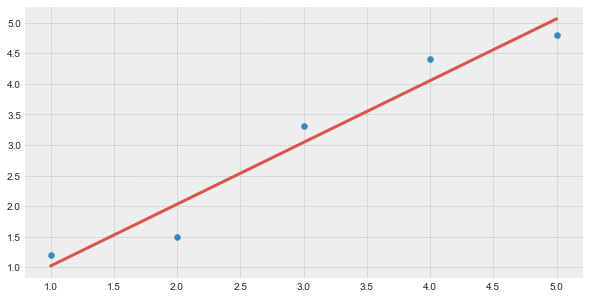

In [176]:
# importing sklearn
from sklearn.linear_model import LinearRegression

# initializing data
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([1.2, 1.5, 3.31, 4.4, 4.8])

# initializing and fitting model
lin_reg = LinearRegression()
model = lin_reg.fit(X, y.reshape(-1,1))

# Plotting data and linear regression line
plot_linear_regression(X, y, model)
#plt.savefig('Figures/lin_reg.png')

* **Representation**:

$$\hat{y} = w_0 + w_1x_1$$

* **Evaluation**: Squared Error

$$\text{Squared Error}= \left(\hat{y} - y\right)^2$$

* **Optimization**: [MSE gradient descent visualization](https://jed-ai.github.io/py1_gd_animation/) 

In [177]:
from sklearn.metrics import mean_squared_error    # squared error across entire dataset

# Making predictions and evaluating
y_pred = model.predict(X)
print("Mean squared error on training set: {}".format((mean_squared_error(y, y_pred)).round(3)))

Mean squared error on training set: 0.115


Since we have labeled data, we know that this is a supervised learning problem!

Let's first talk about the notation. I don't want you to be overwhelmed with all of the notation. I'll define everything, then dig into it.

* $\hat{y}$ is the ouput of our model, the prediction
* $w_i$ are the weights, or the parameters of the model (these are the only things that will change
* $x_i$ are our features, they are the columns in our dataset

This equation is actually just $y=mx+b$! I've chosen this notation, (1) to be consistent (I'll always use $w$ to represent the weights) and (2) this type of notation aligns well with the design of many common machine learning api's, so I think it's helpful to think about the algorithms in this fashion and (3) this notation enables us to easily extend this model to operate in multiple dimensional data.

So, $y=mx+b$ is one way to look at Linear Regression's representation, another way to look at it is as the dot product of our weights, and a single row in our dataset. I think that's bit more helpful way to look at things, as the dot product will be used in basically every algorithm working with data.

The metric that is typically used to evaluate the called the `mean-squared error`. All it is doing is taking the difference between your model's prediction (subtracting them), so see how far off your prediction was. Then it just squares that value so that everything is positive. Then takes the average across the entire dataset.

We'll take a visual look at what the optimization does, but to really unpack all it does would require some calculus and that's a bit outside the scope of this presentation. The line/surface represents how wrong our predictions are!

## Logistic Regression

In [178]:
def plot_logistic_regression(X, y, model):    
    # create a mesh to plot in
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - .2 , X[:, 0].max() + .2 
    y_min, y_max = X[:, 1].min() - .2 , X[:, 1].max() + .2
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplots(figsize = (10,5))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, colors = [sns.xkcd_rgb["denim blue"], sns.xkcd_rgb["denim blue"],
                                     sns.xkcd_rgb["pale red"], sns.xkcd_rgb["denim blue"]])

    # plotting points
    plt.scatter(X[:,0], X[:,1], c=y,cmap = my_cmap, edgecolor = "black")

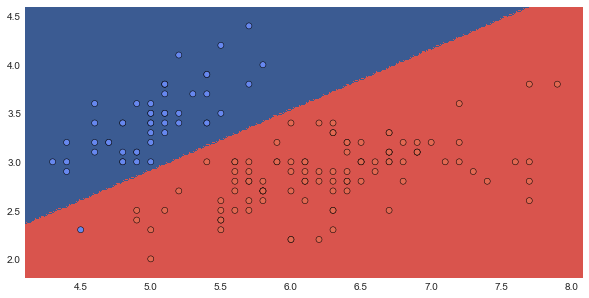

In [179]:
# importing sklearn
from sklearn.linear_model import LogisticRegression

# initializing data
X = np.concatenate((customer_data.data[:,0].reshape(150,1), 
                    customer_data.data[:, 1].reshape(150,1)), axis=1)
y = (customer_data.target != 0) * 1

# fitting model
log_reg = LogisticRegression(solver = 'liblinear', multi_class='auto')
model = log_reg.fit(X, y)
                             
# plotting decision boundary
plot_logistic_regression(X, y, model)

* **Representation**: Sigmoid Function (Given that $z= w_0+w_1x_1 + w_2x_2$)

\begin{align*}
\hat{y} &= \frac{1}{1+e^{-z}}\\
&= \frac{1}{1+e^{-(w_0+w_1x_1 + w_2x_2)}}\\
&= \text{probability that given datapoint is from class 1}
\end{align*}

* **Evaluation**: Log Loss

$$ \text{Log Loss}= \left(-y \log(\hat{y})\right) - \left((1-y)\log(1-\hat{y})\right) $$

In [180]:
from sklearn.metrics import log_loss    # log loss across entire dataset

# Making predictions and evaluating
y_pred = model.predict(X)
print("Mean log loss on training set: {}".format((log_loss(y, y_pred)).round(3)))

Mean log loss on training set: 0.23


In [181]:
from sklearn.metrics import classification_report

target_names = ['class 0', 'class 1']
print(classification_report(y, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       1.00      0.98      0.99        50
     class 1       0.99      1.00      1.00       100

   micro avg       0.99      0.99      0.99       150
   macro avg       1.00      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150



Logistic Regression is a supervised, classification algorithm. This is the customer data that we saw earlier and we see here that our logistic regression model drew approximately the same separating line that we did. Logistic regression is all about the sigmoid function.

* $\hat{y}$ is our model's prediction which will be a value between 0 and 1, which we can interpret as a probability that that given datapoint is from class 1.

* Again, $w_i$ are the weights and $x_i$ are the features of the datapoint

We see that the logistic regression's model requires that we take the dot product of our weights and a datapoint, then feed that into the Sigmoid function. We use the sigmoid function because its outputs are always between 0 and 1, which is exactly what we need for probabilities! As we can see in the evaluation phase, we use the Log Loss function, which again tells us how wrong our predictions are. Another way to look at it is as a function that returns a penalty to our algorithm pertaining to how wrong it is.

So just like previously, we can look at how wrong our model was across our dataset.. (print log loss)
Bust most often in a supervised classification problem, we're more interested in just seeing how accurate our predictions were. Sci-kit learn's has api has a nice `classification_report` print out. There's a lot going on here, but I want to draw your attention to the weighted average of precision and recall from class 0 and 1. Precision and recall are two metrics we use to measure how accurate a classifying model is, and they're subtly different. Precision = $\frac{tp}{tp+fp}$ (Out of all the times you guessed yes, how many times were you correct?). Recall = $\frac{tp}{tp+fn}$ (Out of all the datapoints from the positive class, how many did you guess correctly about?). In many cases, the differences between these two metrics is negligent. Where they begin to diverge is when you're dealing with imbalanced data... Share story about GR drunk crash predictions.

The metric you choose to optimize on can have a huge impact on your ultimate model!

## Support Vector Machines

In [182]:
def plot_svm(clf, X, y):
    # plotting
    plt.subplots(figsize = (10,5))
    plt.scatter(X[:,0], X[:,1], c=y, cmap = my_cmap)


    # Get x and y lims
    xlim = plt.xlim()
    ylim = plt.ylim()


    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(xlim[0], xlim[1], 100)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    # get the parallels to the separating hyperplane that pass through the
    # support vectors
    b = clf.support_vectors_[0]
    yy_down = a * xx + (b[1] - a * b[0])
    b = clf.support_vectors_[-1]
    yy_up = a * xx + (b[1] - a * b[0])

    # plot the line, the points, and the nearest vectors to the plane
    plt.plot(xx, yy, 'k-')
    plt.plot(xx, yy_down, 'k--')
    plt.plot(xx, yy_up, 'k--')
    plt.fill_between(xx, yy_down, yy_up, edgecolor='none', color='#AAAAAA', alpha=0.3)

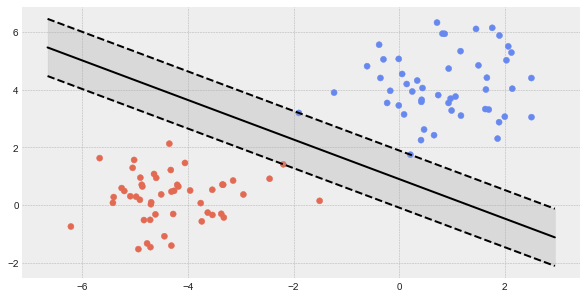

In [183]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC

# generating dataset
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=3)
np.place(y, y==0, -1)

# initializing SVM
svm = SVC(kernel = 'linear')
model = svm.fit(X,y)

# plotting_svm
plot_svm(model, X, y)

* **Representation**: 

$$w_o+w_1x_1+w_2x_2=0$$

* **Evaluation**: Hinge Loss

\begin{align*}
\text{Hinge Loss}&= \left[ 1 - y \cdot \left( \text{dot}(w,x) \right)\right]_+\\
&= \left[ 1 - y \cdot \left( w_o+w_1x_1+w_2x_2 \right)\right]_+
\end{align*}

* **Optimization**: [Stanford web demo](http://vision.stanford.edu/teaching/cs231n-demos/linear-classify/)

[more explanation](https://github.com/collinprather/BDI-2018-JupyterHub/blob/master/SVM_scratch.ipynb)

What a SVM does is pretty similar to logistic regression, which makes sense, because they are both alogrithms that solve supervised classification problems, but how it does it is very different. The ultimate goal of a support vector machine is to find the optimal line that maximizes the margin between the two classes of data, so it doesn't have anything to do with probabilities. (Show line and margin). It's called an SVM because the datapoints that are right on the margin are called the "support vectors" (point them out).

Note that it may seem strange that a linear regression model and SVM's are represented in such similar ways, but that this makes sense because they both really are all about finding that optimal line! That "optimal line", however, serves very different purposes. Here, it's not making any predictions, just trying to separate the two classes.

The hinge loss function is basically just calculating the Euclidean distance of each data point from the separating line, which we then try to maximize in the optimization phase! (show demo!)

## Detour through the Bias-Variance Trade-off

![bias-variance](Figures/bias_variance.png)

The bias-variance trade off in ML is analogous to the time-space tradeoff in computer science. And this is a critical aspect to take into consideration when choosing/training a predicitive model for a given problem. These dartboards create a great analogy for understanding the bias-variance trade-off. I got this analogy from a paper written by Pedro Domingos, a professor at UW. 

Bias and Variance have some specific definitions in statistics, usually invlolving some greek letters like $\sigma$ and $\epsilon$, but in this context, they are adjectives that we use to describe the behavior of a machine learning model. 

For example, If I were to say that our model has high variance, then that means that its predictions would vary significantly if we were to train it on a different sample of our dataset. As we can see in the "High Variance" column, are spread pretty randomly across the board, there's no consistency.

If I were to say that our model was highly biased, then that would mean that it’s predictions are very consistent, regardless of the sample of data that we trained it on. As we can see in this "High Bias" row, the darts all hit in relatively the same area (that does not necessarily mean accurate, as we see in the bottom right corner.)

Generally, bias and variance are inversely related, and controlled by the complexity of our model. If it is a highly complex model, like a neural network, it's more likely to be high in variance. If you're working with a simpler model line, say, linear regression, it is more likely that your model is biased.

Ultimately, our target it to have a model that is low in bias and low in variance. Top-left corner, that's a bullseye. So how do we practically do that?

* SVM's Hinge Loss function with $L_2$ regularization

$$\text{Hinge Loss}= \left[ 1 - y \cdot \left( \text{dot}(w,x) \right)\right]_+ + \lambda\sum_{i=1}^{n} w^{2}_i$$

![lambda-comparisons](Figures/lambda_comparisons_sns_cmap.png)

One of the most straightforward ways to control the bias-variance tradeoff is by introducing a "regularization" term into our loss function. I've included our same hinge loss function that we looked at above, but I've just added a regularization term to the end, the "+ $\lambda$ portion" (this is called $L_2$ regularization, which is very commonly used in practice).

This regularization imposed an additional constraint on the weights in our model and manipulates how they are updated. This $\lambda$ variable ends up being a tuning parameter that can control the level of bias or variance in the model.

* As $\lambda$ gets smaller and smaller, the margin grows wider and wider (often to the point of misclassifying datapoints)
* As $\lambda$ gets larger and larger, the margin grows thinner and thinner (often to the point of perfectly classifying datapoints)

In this simple example, these two values of $\lambda$ change the margins and the support vectors considerably, but it doesn't actually change any of the predictions, yet, with more complicated, higher-dimensional data, that $\lambda$ parameter can have big implications.

## Neural Networks

### Convolution Neural Network (CNN)

![cnn](Figures/cnn.jpeg)

Convolution neural networks, or CNN's, are typically used to make predictions about image data. These types of neural nets take in the pixel values of a given image, run it through a ton of transformations and computations, and learn features about the given image (this "feature learning" portion is the true CNN part of it), then feed those features into a traditional neural net (the "classification" portion at the end) to get predictions.

CNN's have had lots of success in supervised classification problems. It is the primary architecture of neural net that is used by autonomous vehicles to identify if there is a stop sign, or car, or pedestrian, etc (and that is kind of what this diagram is signifying).

### Recurrent Neural Network (RNN)

![cnn](Figures/rnn.jpeg)

Recurrent Neural Networks, or RNN's, are used to make predictions about sequential data. The best examples about sequential data would be time series, or text data. Any sort of data that depends on previous data. The RNN's architecture reflects this, as the output of each layer, is then the input of the next layer, as the diagonals in the diagram express.

So an RNN may be used to make a 7-day forecast about the stock market. Or maybe you'll feed it a sentence in english, then it will output that exact same sentence translated into French.

One great benefit of the RNN's architecture is that there is no fixed input length. With a traditional neural net, or even a CNN, your feed it a fixed input, and it gives you some fixed output. An RNN on the other hand is flexible enough to dynamically-sized inputs.

# What's got the ML Community Buzzing

I want to end today by highlighting some events that the ML community has been buzzing about recently, and that I think are just interesting applications of deep learning.

All that we've talked through today are the building blocks to these cutting-edge models as well!

## NVIDIA's GAN-Generated Faces

![nvidia-gan-faces](Figures/nvidia_gan_faces.jpg)

## Code Generation using Computer Vision

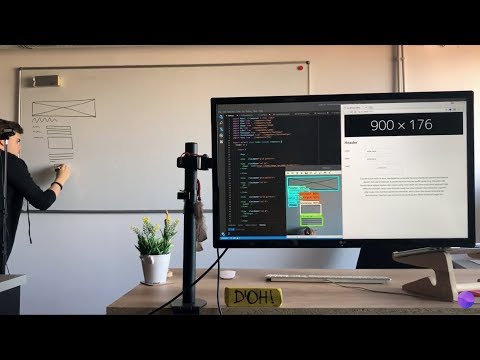

In [6]:
from IPython.display import YouTubeVideo
vid = '_oet4GOzcRQ'
YouTubeVideo(id = vid, width = 850, height = 400)

People could literally just draw their websites!

## Image Style Transfer

![style-transfer](Figures/style_transfer.png)

### S/O to deepart.io

![jeff-style-transfer](Figures/jeff_style_transfer.png)

CONCLUSION

All things considered, it's an exciting time in the world of ML and its as accessible as ever! I hope that your mind is beginning to think of use-cases on the projects that you're working on!